<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [615]:
import pandas as pd
import psycopg2
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [617]:
#создаем соединение с заданными параметрами
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [618]:
# текст запроса
query_3_1 = f'''
select count(*)
from public.vacancies
'''

In [619]:
# результат запроса
df_vacancies = pd.read_sql_query(query_3_1, connection)
df_vacancies


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [620]:
# текст запроса
query_3_2 = f'''
select count(*)
from public.employers
'''

In [621]:
# результат запроса
df_employers = pd.read_sql_query(query_3_2, connection)
df_employers


,count
0,23501


3. Посчитайте с помощью запроса количество регионов (таблица areas).

In [622]:
# текст запроса
query_3_3 = f'''
select count(*)
from public.areas
'''

In [623]:
# результат запроса
df_areas = pd.read_sql_query(query_3_3, connection)
df_areas

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [624]:
# текст запроса
query_3_4 = f'''
select count(*)
from public.industries
'''

In [625]:
# результат запроса
df_industries = pd.read_sql_query(query_3_4, connection)
df_industries

,count
0,294


#### Выводы по предварительному анализу данных:
1. В среднем каждый работодатель предоставляет по 2 вакансии.
2. Среднее количество работодателей приходящихся на одну сферу деятельности 4,6.

***

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [626]:
# текст запроса
query_4_1 = f'''
select count(v.id),
a.name
from public.vacancies v 
    join public.areas a on v.area_id=a.id 
group by a.name
order by 1 desc
limit 5
'''

In [627]:
# результат запроса
df_vac_area = pd.read_sql_query(query_4_1, connection)
df_vac_area

,count,name
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [628]:
# текст запроса
query_4_2 = f'''
select count(*)
from public.vacancies 
where salary_from IS NOT NULL or salary_to IS NOT NULL
'''

In [629]:
# результат запроса
df_salary = pd.read_sql_query(query_4_2, connection)
df_salary

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [630]:
# текст запроса
query_4_3 = f'''
select round(avg(salary_from)),
round(avg(salary_to))
from public.vacancies
'''

In [631]:
# результат запроса
df_avg_salary = pd.read_sql_query(query_4_3, connection)
df_avg_salary

,round,round
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [632]:
# текст запроса
query_4_4 = f'''
select concat(schedule, ' - ', employment) se,
count(id)
from public.vacancies 
group by se
order by 2 desc
'''



In [633]:
# результат запроса
df_se = pd.read_sql_query(query_4_4, connection)
df_se

,se,count
0,Полный день - Полная занятость,35367
1,Удаленная работа - Полная занятость,7802
2,Гибкий график - Полная занятость,1593
3,Удаленная работа - Частичная занятость,1312
4,Сменный график - Полная занятость,940
5,Полный день - Стажировка,569
6,Вахтовый метод - Полная занятость,367
7,Полный день - Частичная занятость,347
8,Гибкий график - Частичная занятость,312
9,Полный день - Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [634]:
# текст запроса
query_4_5 = f'''
select experience,
count(id)
from public.vacancies 
group by 1
order by 2
limit 5
'''

In [635]:
# результат запроса
df_exp = pd.read_sql_query(query_4_5, connection)
df_exp

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


#### Выводы по детальному анализу вакансий:
1. Верхняя вилка заработной платы в среднем в 1.5 раза больше нижней вилки.
2. Количество вакансий в Москве наибольшее.
3. Примерно половина вакансий с требуемым опытом от 1 года до 3 лет.


***

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [636]:
# текст запроса
query_5_1 = f'''
select e.name,
count(v.id)
from public.vacancies v 
    join public.employers e on v.employer_id=e.id
group by 1
order by 2 desc
limit 5
'''

In [637]:
# результат запроса
df_emp = pd.read_sql_query(query_5_1, connection)
df_emp

,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [638]:
# текст запроса
query_5_2 = f'''
select a.name,
	count(distinct e.id) employers, 
	count(distinct v.id) vacancies
from public.areas a 
	left join public.employers e on e.area = a.id
    left join public.vacancies v on v.area_id=a.id
where v.id is null
group by 1 
order by 3 asc, 2 desc
limit 5
'''

In [639]:
# результат запроса
df_ev = pd.read_sql_query(query_5_2, connection)
df_ev

,name,employers,vacancies
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [640]:
# текст запроса
query_5_3 = f'''
select e.name,
	count(distinct v.area_id)
from public.vacancies v 
	join public.employers e on e.id = v.employer_id
group by 1
order by 2 desc
limit 5
'''

In [641]:
# результат запроса
df_ea = pd.read_sql_query(query_5_3, connection)
df_ea

,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [642]:
# текст запроса
query_5_4 = f'''
select count(*)
from public.employers e
	left join public.employers_industries ei on ei.employer_id=e.id
where ei.industry_id is null
'''

In [643]:
# результат запроса
df_ei = pd.read_sql_query(query_5_4, connection)
df_ei

,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [644]:
# текст запроса
query_5_5 = f'''
select e.name "Имя работдателя",
count(ei.industry_id) "Кол-во сфер деятельности"
from public.employers e
	left join public.employers_industries ei on ei.employer_id=e.id
group by 1
having count(ei.industry_id) = 4
order by 1
limit 3
'''

In [645]:
# результат запроса
df_ic = pd.read_sql_query(query_5_5, connection)
df_ic

,Имя работдателя,Кол-во сфер деятельности
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [646]:
# текст запроса
query_5_6 = f'''
select count(*)
from public.employers_industries ei
	left join public.industries i on ei.industry_id=i.id
where i.name = 'Разработка программного обеспечения'
'''

In [647]:
# результат запроса
df_ei = pd.read_sql_query(query_5_6, connection)
df_ei

,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [648]:
# код для получения списка городов-милионников
from bs4 import BeautifulSoup
import requests

url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-'\
    '%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%'\
    'BE%D1%81%D1%81%D0%B8%D0%B8'
pages = requests.get(url)
pages.text
page = BeautifulSoup(pages.text, 'html.parser')
#получем список всех "тел таблиц" в тэге <tbody> представленных на сайте
tabs = page.find_all('tbody')
#по коду элемента определяем, что наша таблица вторая в списке
#достаем текст из нашей таблицы внутри тега <a> начиная с 5го
cities = [tab.text for tab in tabs[1].find_all('a')[4::]]
cities.remove('[a]')
display(cities)


['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Челябинск',
 'Красноярск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Омск',
 'Краснодар',
 'Воронеж',
 'Пермь',
 'Волгоград']

In [649]:
# текст запроса
query_5_7 = f'''
select a.name "Город" ,
count(v.id) "Кол-во вакансий"
from public.vacancies v
	join public.areas a on a.id=v.area_id
	join public.employers e on e.id=v.employer_id
where e.name='Яндекс'
group by a.name
order by 2
'''

In [650]:
# результат запроса
df_yandex = pd.read_sql_query(query_5_7, connection)
df_yandex['Город'] = df_yandex['Город'].astype('string')
df_yandex = df_yandex[df_yandex['Город'].isin(cities)]
#Добавляем строчку с сумарным количеством вакансий для Яндекса
df_yandex = df_yandex.append(
    {'Город':'Total', 'Кол-во вакансий':df_yandex[
        'Кол-во вакансий'].sum()}, ignore_index=True) 
display(df_yandex)

,Город,Кол-во вакансий
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


#### Выводы по анализу работодателей:
1. Яндекс крупнейший (с большим отрывом) работодатель СНГ предоставляющий вакансии в большинстве регионов.
2. Самые крупные работодатели на рынке труда ожидаемо являются крупными компаниями с большим штатом.
3. Поляков Денис Иванович предоставляет вакансии для жителей аж 88 регионов.=) Молодец!)

***

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [651]:
# текст запроса
query_6_1 = f'''
select count(*)
from  public.vacancies v 
where lower(v.name) like '%data%' or lower(v.name) like '%данн%'
'''

In [652]:
# результат запроса
df_d = pd.read_sql_query(query_6_1, connection)
df_d 

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [653]:
# текст запроса
query_6_2 = f'''
select count(*)
from  public.vacancies v 
where (lower(v.name) like '%data scientist%' 
	or lower(v.name) like '%data science%'
	or lower(v.name) like '%исследователь данных%'
	or (v.name like '%ML%' and v.name not like '%HTML%')
	or lower(v.name) like '%machine learning%'
	or lower(v.name) like '%машинн%обучен%')
	and 
 	(lower(v.name) like '%junior%'
	or lower(experience) like '%нет опыта%' 
 	or lower(schedule) = '%cтажировка%')
'''

In [654]:
# результат запроса
df_dsj = pd.read_sql_query(query_6_2, connection)
df_dsj

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [655]:
# текст запроса
query_6_3 = f'''
select count(*)
from  public.vacancies v 
where (lower(v.name) like '%data scientist%' 
	or lower(v.name) like '%data science%'
	or lower(v.name) like '%исследователь данных%'
	or (v.name like '%ML%' and v.name not like '%HTML%')
	or lower(v.name) like '%machine learning%'
	or lower(v.name) like '%машинн%обучен%')
	and (key_skills like '%SQL%' or key_skills like '%Postgres%')
'''

In [656]:
# результат запроса
df_dssp = pd.read_sql_query(query_6_3, connection)
df_dssp

,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS. Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [657]:
# текст запроса
query_6_4 = f'''
select count(*)
from  public.vacancies v 
where (lower(v.name) like '%data scientist%' 
	or lower(v.name) like '%data science%'
	or lower(v.name) like '%исследователь данных%'
	or (v.name like '%ML%' and v.name not like '%HTML%')
	or lower(v.name) like '%machine learning%'
	or lower(v.name) like '%машинн%обучен%')
	and (key_skills like '%Python%')
'''

In [658]:
# результат запроса
df_dsp = pd.read_sql_query(query_6_4, connection)
df_dsp

,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [659]:
# текст запроса
query_6_5 = f'''
select round(avg(length(key_skills) \
    - length(replace(key_skills, CHR(9),'')) + 1), 2)
from  public.vacancies v 
where (lower(v.name) like '%data scientist%' 
	or lower(v.name) like '%data science%'
	or lower(v.name) like '%исследователь данных%'
	or (v.name like '%ML%' and v.name not like '%HTML%')
	or lower(v.name) like '%machine learning%'
	or lower(v.name) like '%машинн%обучен%')
	and lower(key_skills) is not null
'''


In [660]:
# результат запроса
df_ks = pd.read_sql_query(query_6_5, connection)
df_ks

,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [661]:
# текст запроса
query_6_6 = f'''
select experience,
round(avg(coalesce((salary_from+salary_to)/2, salary_to, salary_from))) \
    "Средняя ЗП (руб.)"
from  public.vacancies v 
where (lower(v.name) like '%data scientist%' 
	or lower(v.name) like '%data science%'
	or lower(v.name) like '%исследователь данных%'
	or (v.name like '%ML%' and v.name not like '%HTML%')
	or lower(v.name) like '%machine learning%'
	or lower(v.name) like '%машинн%обучен%')
	and (salary_from is not null or salary_to is not null)
group by experience
'''

In [662]:
# результат запроса
df_ds_salary = pd.read_sql_query(query_6_6, connection)
df_ds_salary

,experience,Средняя ЗП (руб.)
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


#### Выводы по предметному анализу:
1. Большое количество вакансий имеют отношение к данным. 
2. Знание Python для специалиста DS является более приоритетным скиллом, чем знание SQL. 
3. ЗП для Data Science выше чем средняя ЗП на рынке труда.

***

### Дополнительные исследования
#### 1. Исследование распределения количества ваканcий в зависимости от предъявляемого требования опыта к соискателю.

In [663]:
# текст запроса
query_expirience = f'''
select experience, 
count(*) "Кол-во вакансий"
from public.vacancies
group by experience
order by 2
'''

In [664]:
# результат запроса
df_expirience = pd.read_sql_query(query_expirience, connection)
df_expirience

,experience,Кол-во вакансий
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


#### 2. Исследование распределения средней ЗП в зависимости от типа занятости и типа трудоустройства.

In [665]:
# текст запроса "средняя ЗП - тип занятости"
query_schedule = f'''
select schedule "Тип занятости", 
round(avg(coalesce((salary_from+salary_to)/2, salary_to, salary_from))) \
    "Средняя ЗП (руб.)",
    count(*) "Кол-во вакансий"
from public.vacancies
where salary_from is not null or salary_to is not null
group by schedule
order by 2
'''

# текст запроса "средняя ЗП - тип трудоустройства"
query_employment = f'''
select employment "Тип трудоустройства", 
round(avg(coalesce((salary_from+salary_to)/2, salary_to, salary_from))) \
    "Средняя ЗП (руб.)",
    count(*) "Кол-во вакансий"
from public.vacancies
where salary_from is not null or salary_to is not null
group by employment
order by 2
'''

In [666]:
# результат запросов
df_schedule = pd.read_sql_query(query_schedule, connection)
display(df_schedule)

df_employment = pd.read_sql_query(query_employment, connection)
display(df_employment)

,Тип занятости,Средняя ЗП (руб.),Кол-во вакансий
0,Сменный график,44532.0,821
1,Полный день,80126.0,17377
2,Гибкий график,100693.0,853
3,Удаленная работа,101323.0,4752
4,Вахтовый метод,123790.0,270


,Тип трудоустройства,Средняя ЗП (руб.),Кол-во вакансий
0,Частичная занятость,31566.0,1360
1,Стажировка,37249.0,354
2,Полная занятость,88240.0,22195
3,Проектная работа,92086.0,164


#### 3. Сравнение средней ЗП и количества вакансий для специалистов "1С" и "Data Science".

In [667]:
# текст запроса
query_1c_ds = f'''
select 'DS' "Специализация",
round(avg(coalesce((salary_from+salary_to)/2, salary_to, salary_from)))\
    "Средняя ЗП",
count(*) "Кол-во вакансий"
from  public.vacancies v 
where (lower(v.name) like '%data scientist%' 
	or lower(v.name) like '%data science%'
	or lower(v.name) like '%исследователь данных%'
	or (v.name like '%ML%' and v.name not like '%HTML%')
	or lower(v.name) like '%machine learning%'
	or lower(v.name) like '%машинн%обучен%')
	and lower(key_skills) is not null
union 
select '1С' "Специализация", 
round(avg(coalesce((salary_from+salary_to)/2, salary_to, salary_from)))\
    "Средняя ЗП",
count(*) "Кол-во вакансий"
from  public.vacancies v 
where v.name like '%1С%'
	and (salary_from is not null or salary_to is not null)
'''

In [668]:
# результат запросов
df_1c_ds = pd.read_sql_query(query_1c_ds, connection)
df_1c_ds

,Специализация,Средняя ЗП,Кол-во вакансий
0,1С,103685.0,2232
1,DS,182888.0,431


#### 4. Сравнение средней ЗП в городах-миллионниках и других регионах.

In [669]:
# текст запроса
query_salary_area = f'''
/*Запрашиваем среднюю ЗП по всем указаным регионам*/
select a.name "Город",
round(avg(coalesce((salary_from+salary_to)/2, salary_to, salary_from)))\
    "Средняя ЗП"
from  public.vacancies v 
	join public.areas a on a.id=v.area_id
where salary_from is not null or salary_to is not null
group by a.name
'''

,Город,Средняя ЗП
0,other,63995.0
1,Волгоград,68689.0
15,Уфа,74733.0
6,Красноярск,75156.0
16,Челябинск,77463.0
13,Самара,80223.0
2,Воронеж,84958.0
10,Омск,86393.0
3,Екатеринбург,91896.0
4,Казань,92207.0


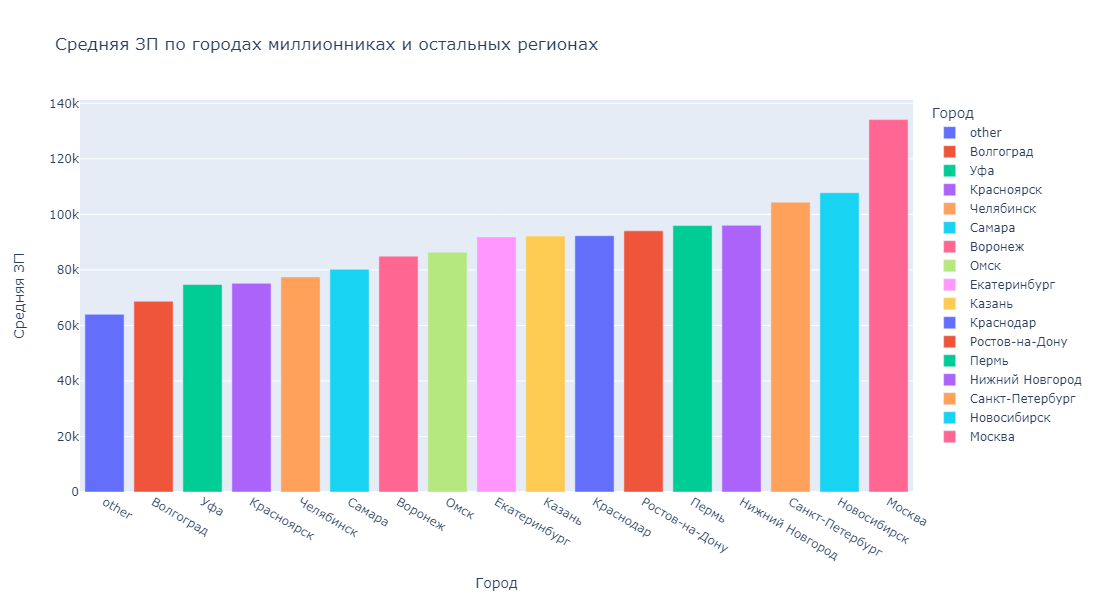

In [670]:
# результат запросов

df_salary_area = pd.read_sql_query(query_salary_area, connection)
df_salary_area['Город'] = df_salary_area['Город'].apply(lambda x: x if x in cities else 'other')
df_salary_area = df_salary_area.groupby('Город', as_index=False)['Средняя ЗП'].mean().round()
df_salary_area = df_salary_area.sort_values(by='Средняя ЗП')

display(df_salary_area)

#визуализируем среднюю ЗП по городам и регионам
fig = px.bar(
    data_frame=df_salary_area,
    x='Город',
    y='Средняя ЗП',
    color='Город',
    orientation='v',
    height=600,
    width=1100,
    title='Средняя ЗП по городах миллионниках и остальных регионах'
)
fig.show('png')


In [671]:
connection.close()

# Общий вывод по проекту

1. Ожидаемо подавляющее большинство вакансий на рынке труда на полный день и полную занятость. Большой перевес количества вакансий с удаленной работой над вакансиями с гибким графиком, что говорит о готовности работодателей "не видеть вживую" своего сотрудника и большом выборе вакансий позволяющих работать удаленно. Причем средняя ЗП для удаленного типа работы выше, чем у вакансий на полный день и проигрывает лишь вакансиям с вахтовым методом.
2. Половину вакансий составляют вакансии с требованием по опыту работы от 1 года до 3 лет, что говорит об естественном желании работодателя найти перспективного, уже готового, но "недорогого" специалиста. Хочется отметить минимальное количество вакансий с опытом "больше 6-ти лет". С большей вероятностью люди с опытом уже имеют имя в своих сферах деятельности и рекрутеры выходят на них другими способами, игнорируя сервисы рынка труда.
3. Минимальный спрос и максимальная средняя ЗП для вакансий по типу трудоустройства у "Проектная работа", что возможно обусловлено уникальностью рабочего процесса и повышенными требованиями к квалификации к исполнителю.
4. Средняя заработная плата в крупных городах выше, чем в регионах. Сильно выбивается Москва.
5. Сравнительный анализ рынка труда показал, что специалистам Data Science готовы предложить большую ЗП, чем специалистам в сфере "1С" при том, что спрос на вторых значительно выше, чем на первых. Для объективного вывода нужно провести дополнительно сравнительный анализ предложения рынка труда для специалистов в этих областях.
